##                                                                    INFO 6210

##                                               Data Management and Database Design

##                                                      Take Home Exam Part 2 (NoSQL) 

#### DATA SET:
I have scraped the IMDB website.

Reference: http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1

At the site, I find that while using advanced search feature we can have look at the best movies in the given time frame by 50 movies per page.

I have cleaned the data after doing various operations like scraping, data munjing, cleaning. 

Finally I have the data in below fields:

Now, analyzing the page has given various attributes like:
ϖ	Movie_names

ϖ	Year_release

ϖ	Imdb_ratings

ϖ	Metascores

ϖ	Votes

ϖ	Movie Description

ϖ	Certificate

ϖ	Runtime

ϖ	Director Name

ϖ	Star Cast

ϖ	Gross Value

In this assignment, I have to convert by SQL database to NOSQL database.

## Parts:
1. Conversion from SQL to NOSQL:

2. Analyzing the data in NOSQL

3. Running the basic Queries

4. Questions Answers

##### I have used ROBO 3T for MongoDB IDE.


### A description of the design choices i made in converting your SQL Schema that makes sense will be explained as we will proceed:

My SQL database has various tables which are in 1N form. 

Various decisions that I took before I converted my SQL database to NOSQL.

ϖ	Earlier I had 16 tables which had to convert to collections so that purpose of MongoDB can be solved.

ϖ	I decided to convert all those tables into 4 collections named as:

a.	Movies

b.	Hashtags

c.	Tweets

d.	Users


## Installing MongoDB over your system:

#### Install the software from the given link:

1. https://docs.mongodb.com/manual/installation/

It is very easy to install it and you can see youtube videos also which helped me in installing and making connection with the port 27017.

2. https://www.youtube.com/watch?v=DX15WbKidXY&t=601s

#### IDE for Mongodb:
I have used ROBO 3T as IDE to use MongoDB:

3. https://www.youtube.com/watch?v=-yDc95V5cLM

It really helped me in running queries over MongoDB as it is difficult to write code over Terminal as it is very dull and you have to write ur command again if anything goes wrong.

This is not the case with Robo 3T.

So, Let's begin with making connectiong Python Notebook with MongoDb:

## Very Important: Always make sure that your MongoDB is running in the background whenever you try to connect it from python notebook:

## Creating connection of Python with MongoDb:

I am using pymongo using Mongoclient for making connection.

In [1]:
import pymongo
conn=pymongo.MongoClient()
conn

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [2]:
from pymongo import MongoClient

In [3]:
client = MongoClient()

## We have to connect it the port 27017. This is the default port defined for MongoDB.
You can change the port number if you want.

In [4]:
MongoClient('localhost', 27017)

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [5]:
db= conn.mydb
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'mydb')

## I am making connection with the database named as below:
If you have already created the database with the name then it wil simply make the connection with that database otherwise, it will make new database with the given name:

In [6]:
db =conn['ajaygoel-proj-imdb-twit']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ajaygoel-proj-imdb-twit')

## Now, Let me check which database are there:

In [8]:
conn.database_names()

['NewDb',
 'admin',
 'ajaygoel-proj-imdb-twit',
 'ajaygoel-test',
 'config',
 'local']

# Designing the database:

## Making collections:
It is very important to decide how you will design your MongoDb database as we uses MONGODB for following reasons:

1. You Expect a High Write Load
2. You need High Availability in an Unreliable Environment
3. You need to Grow Big (and Shard Your Data)
4. Your Data is Location Based

ϖ	Conversion of each collection has a purpose like:
1. Movies: It has all the data related to the movies which is extracted from the IMDB website.


## Creating one collection named as movies:

In [9]:
collection=db.movies
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ajaygoel-proj-imdb-twit'), 'movies')

#### Now, collection has the cursor of db.movies
We can see our collection also that we have present in our database:

The hashtags was for testing purpose.

In [10]:
db.collection_names()

['hashtags', 'movies']

## Now,

1. In MongoDB, data can be present in inconsistent way.
2. But in my data, I had various columns which has null values. So, I had to remove them so that collections have only those columns which have data in it as this is the purpose of using MongoDB.

3. I took very major steps in disintegrating the data into 4 collections so that collection formed has its meaning and we can answer all the questions related to topic.

4. I kept movie in each collection so that we can analyze the collection on the basis of the movie which is our main aim.
### MongoDB takes data in json format
So, we will import json module

In [11]:
import json

## Loading of data in python:
1. I will load the data from the csv that i have saved earlier when i was extracting data of movies.
2. Other method is to join all the tables from the SQL database and extracting data from the tables.

In [115]:
mov=pd.read_csv("complete_data.csv",encoding='latin-1')

In [116]:
mov.size

35075

## Conversion to JSON:
I will convert the data to JSON format so that i can insert it into my MONGODB database:

In [117]:
mov_records = json.loads(mov.T.to_json()).values()

## Dumping the data into the database:

In [118]:
collection.insert(mov_records)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  if __name__ == '__main__':


[ObjectId('5abaed7bda9d1a11dd39fd3d'),
 ObjectId('5abaed7bda9d1a11dd39fd3e'),
 ObjectId('5abaed7bda9d1a11dd39fd3f'),
 ObjectId('5abaed7bda9d1a11dd39fd40'),
 ObjectId('5abaed7bda9d1a11dd39fd41'),
 ObjectId('5abaed7bda9d1a11dd39fd42'),
 ObjectId('5abaed7bda9d1a11dd39fd43'),
 ObjectId('5abaed7bda9d1a11dd39fd44'),
 ObjectId('5abaed7bda9d1a11dd39fd45'),
 ObjectId('5abaed7bda9d1a11dd39fd46'),
 ObjectId('5abaed7bda9d1a11dd39fd47'),
 ObjectId('5abaed7bda9d1a11dd39fd48'),
 ObjectId('5abaed7bda9d1a11dd39fd49'),
 ObjectId('5abaed7bda9d1a11dd39fd4a'),
 ObjectId('5abaed7bda9d1a11dd39fd4b'),
 ObjectId('5abaed7bda9d1a11dd39fd4c'),
 ObjectId('5abaed7bda9d1a11dd39fd4d'),
 ObjectId('5abaed7bda9d1a11dd39fd4e'),
 ObjectId('5abaed7bda9d1a11dd39fd4f'),
 ObjectId('5abaed7bda9d1a11dd39fd50'),
 ObjectId('5abaed7bda9d1a11dd39fd51'),
 ObjectId('5abaed7bda9d1a11dd39fd52'),
 ObjectId('5abaed7bda9d1a11dd39fd53'),
 ObjectId('5abaed7bda9d1a11dd39fd54'),
 ObjectId('5abaed7bda9d1a11dd39fd55'),
 ObjectId('5abaed7bda9d1a

## Checking data if i am successful in dumping the data or not..

In [51]:
for d in collection.find()[:]:
    print (d)

{'_id': ObjectId('5abade33da9d1a11dd39f150'), 'Movie_ID': 1, 'movie_names': 'Inception', 'gross_value': '292576195', 'imdb_ratings': 8.8, 'metscores': 74, 'movie_description': '\rA thief, who steals corporate secrets through the use of dream-sharing technology, is given the inverse task of planting an idea into the mind of a CEO.', 'runtime': '148 min', 'votes': 1685228, 'certificate': 'PG-13', 'certificate_id': 1, 'year_release': 2010, 'year_id': 1, 'Genre1': 'Action', 'Genre2': ' Adventure', 'Genre3': ' Sci-Fi            ', 'director_name': 'Christopher Nolan', 'Director_id': 1, 'star1': 'Christopher Nolan', 'star2': ' Leonardo DiCaprio', 'star3': ' Joseph Gordon-Levitt', 'star4': ' Ellen Page', 'star5': 'null', 'star6': 'null'}
{'_id': ObjectId('5abade33da9d1a11dd39f151'), 'Movie_ID': 2, 'movie_names': 'Shutter Island', 'gross_value': '128012934', 'imdb_ratings': 8.1, 'metscores': 63, 'movie_description': '\rIn 1954, a U.S. Marshal investigates the disappearance of a murderer, who e

{'_id': ObjectId('5abade33da9d1a11dd39f2ea'), 'Movie_ID': 411, 'movie_names': 'Men in Black 3', 'gross_value': '179020854', 'imdb_ratings': 6.8, 'metscores': 58, 'movie_description': "\rAgent J travels in time to M.I.B.'s early days in 1969 to stop an alien from assassinating his friend Agent K and changing history.", 'runtime': '106 min', 'votes': 289150, 'certificate': 'PG-13', 'certificate_id': 1, 'year_release': 2012, 'year_id': 3, 'Genre1': 'Action', 'Genre2': ' Adventure', 'Genre3': ' Comedy            ', 'director_name': 'Barry Sonnenfeld', 'Director_id': 411, 'star1': 'Barry Sonnenfeld', 'star2': ' Will Smith', 'star3': ' Tommy Lee Jones', 'star4': ' Josh Brolin', 'star5': 'null', 'star6': 'null'}
{'_id': ObjectId('5abade33da9d1a11dd39f2eb'), 'Movie_ID': 412, 'movie_names': 'Flight', 'gross_value': '93772375', 'imdb_ratings': 7.3, 'metscores': 76, 'movie_description': '\rAn airline pilot saves almost all his passengers on his malfunctioning airliner which eventually crashed, bu

## Please find the screenshot of one row from the collection formed in database:

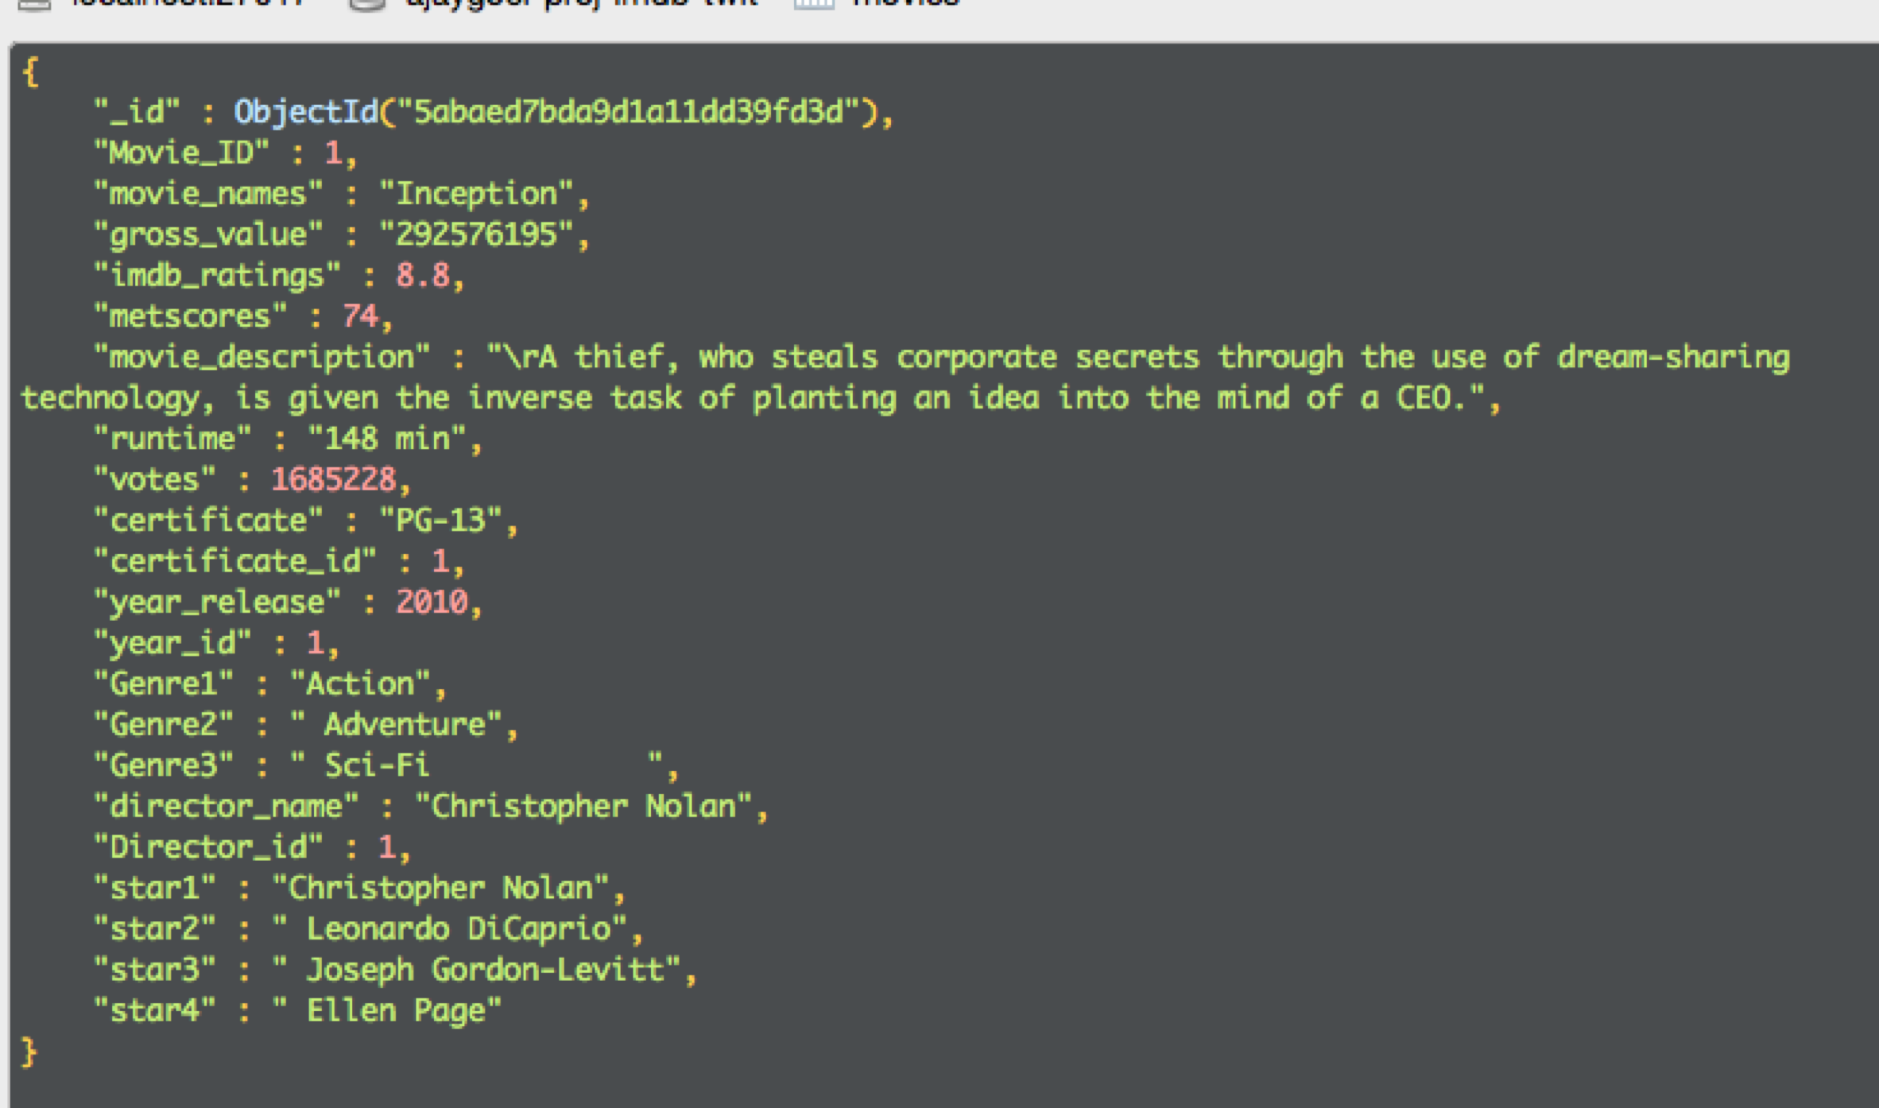


# Designing the database:
## Removing the columns where null is present


ϖ	I can extract data from the collection.

ϖ	Now, Removal of null columns is very important so that data has only those values which are not null.

ϖ   There is no restriction of how you are designing your database. It's your decision but database should be very precise and understandable in your absence.

ϖ   A good database is one where all things related to one collection are kept at one place or collection.

Now, removing the data from columns:

In [119]:
collection.update_many({"star1":"null"},{"$unset":{"star1":"null"}});

In [120]:
collection.update_many({"star2":"null"},{"$unset":{"star2":"null"}});

In [121]:
collection.update_many({"star3":"null"},{"$unset":{"star3":"null"}});

In [122]:
collection.update_many({"star4":"null"},{"$unset":{"star4":"null"}});

In [123]:
collection.update_many({"star5":"null"},{"$unset":{'star5':"null"}});

In [124]:
collection.update_many({"star6":"null"},{"$unset":{"star6":"null"}});

In [125]:
collection.update_many({"gross_value":"null"},{"$unset":{"gross_value":"null"}});

In [126]:
collection.update_many({"Genre2":"null"},{"$unset":{"Genre2":"null"}});

In [127]:
collection.update_many({"Genre3":"null"},{"$unset":{"Genre3":"null"}});

# Our data set for Mongo DB is ready.. we can check the data also..
Our Database will have no null values, as i have removed the null columns with the update many script which has achieved the purpose of Mongo DB

In [128]:
for d in collection.find()[:]:
    print (d)

{'_id': ObjectId('5abaed7bda9d1a11dd39fd3d'), 'Movie_ID': 1, 'movie_names': 'Inception', 'gross_value': '292576195', 'imdb_ratings': 8.8, 'metscores': 74, 'movie_description': '\rA thief, who steals corporate secrets through the use of dream-sharing technology, is given the inverse task of planting an idea into the mind of a CEO.', 'runtime': '148 min', 'votes': 1685228, 'certificate': 'PG-13', 'certificate_id': 1, 'year_release': 2010, 'year_id': 1, 'Genre1': 'Action', 'Genre2': ' Adventure', 'Genre3': ' Sci-Fi            ', 'director_name': 'Christopher Nolan', 'Director_id': 1, 'star1': 'Christopher Nolan', 'star2': ' Leonardo DiCaprio', 'star3': ' Joseph Gordon-Levitt', 'star4': ' Ellen Page'}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd3e'), 'Movie_ID': 2, 'movie_names': 'Shutter Island', 'gross_value': '128012934', 'imdb_ratings': 8.1, 'metscores': 63, 'movie_description': '\rIn 1954, a U.S. Marshal investigates the disappearance of a murderer, who escaped from a hospital for the cri

{'_id': ObjectId('5abaed7bda9d1a11dd39ffa1'), 'Movie_ID': 613, 'movie_names': 'Olympus Has Fallen', 'gross_value': '98925640', 'imdb_ratings': 6.5, 'metscores': 41, 'movie_description': '\rDisgraced Secret Service agent (and former presidential guard) Mike Banning finds himself trapped inside the White House in the wake of a terrorist attack; using his inside knowledge, Banning works with national security to rescue the President from his kidnappers.', 'runtime': '119 min', 'votes': 223801, 'certificate': 'R', 'certificate_id': 2, 'year_release': 2013, 'year_id': 4, 'Genre1': 'Action', 'Genre2': ' Drama', 'Genre3': ' Thriller            ', 'director_name': 'Antoine Fuqua', 'Director_id': 613, 'star1': 'Antoine Fuqua', 'star2': ' Gerard Butler', 'star3': ' Aaron Eckhart', 'star4': ' Morgan Freeman'}
{'_id': ObjectId('5abaed7bda9d1a11dd39ffa2'), 'Movie_ID': 614, 'movie_names': 'Snowpiercer', 'gross_value': '4563650', 'imdb_ratings': 7.0, 'metscores': 84, 'movie_description': '\rSet in a 

### I will create the different collection later in this notebook.

But for now, let's run the basic Queries to get us some clarification over data.

## Basic SQL to NOSQL Queries:

1.) Selecting title, revenue, release data, certificate from database..

You can run the query in q1 and pass that q1 in result1 or you can directly run the query in the find format.

In [15]:
q1 = """({},{"Movie_ID":1,"movie_names":1,"gross_value":1,"year_release":1})"""

In [13]:
result1 = collection.find({},{"Movie_ID":1,"movie_names":1,"gross_value":1,"year_release":1})

Now, to print the data:

In [14]:
for d in result1[:]:
    print (d)

{'_id': ObjectId('5abaed7bda9d1a11dd39fd3d'), 'Movie_ID': 1, 'movie_names': 'Inception', 'gross_value': '292576195', 'year_release': 2010}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd3e'), 'Movie_ID': 2, 'movie_names': 'Shutter Island', 'gross_value': '128012934', 'year_release': 2010}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd3f'), 'Movie_ID': 3, 'movie_names': 'Toy Story 3', 'gross_value': '415004880', 'year_release': 2010}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd40'), 'Movie_ID': 4, 'movie_names': 'Black Swan', 'gross_value': '106954678', 'year_release': 2010}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd41'), 'Movie_ID': 5, 'movie_names': 'Iron Man 2', 'gross_value': '312433331', 'year_release': 2010}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd42'), 'Movie_ID': 6, 'movie_names': "The King's Speech", 'gross_value': '138797449', 'year_release': 2010}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd43'), 'Movie_ID': 7, 'movie_names': 'How to Train Your Dragon', 'gross_value': '217581231', 'year_release': 2

{'_id': ObjectId('5abaed7bda9d1a11dd3a0001'), 'Movie_ID': 709, 'movie_names': 'Dead Man Down', 'gross_value': '10880926', 'year_release': 2013}
{'_id': ObjectId('5abaed7bda9d1a11dd3a0002'), 'Movie_ID': 710, 'movie_names': 'Old Boy', 'gross_value': '2162593', 'year_release': 2013}
{'_id': ObjectId('5abaed7bda9d1a11dd3a0003'), 'Movie_ID': 711, 'movie_names': 'Redemption', 'gross_value': '34956', 'year_release': 2013}
{'_id': ObjectId('5abaed7bda9d1a11dd3a0004'), 'Movie_ID': 712, 'movie_names': 'Runner Runner', 'gross_value': '19316646', 'year_release': 2013}
{'_id': ObjectId('5abaed7bda9d1a11dd3a0005'), 'Movie_ID': 713, 'movie_names': 'Scary Movie 5', 'gross_value': '32015787', 'year_release': 2013}
{'_id': ObjectId('5abaed7bda9d1a11dd3a0006'), 'Movie_ID': 714, 'movie_names': 'Kaze tachinu', 'gross_value': '5209580', 'year_release': 2013}
{'_id': ObjectId('5abaed7bda9d1a11dd3a0007'), 'Movie_ID': 715, 'movie_names': 'Blue Ruin', 'gross_value': '258113', 'year_release': 2013}
{'_id': Objec

## MongoDB Snippet:

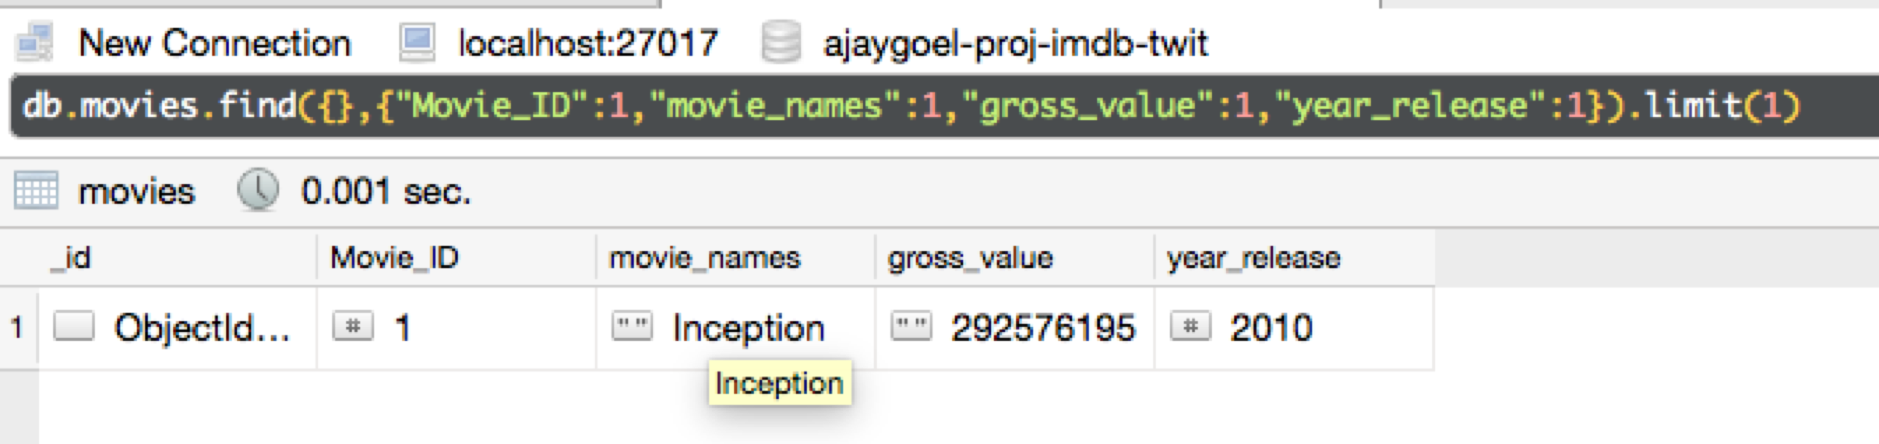

## 2.) To get the movie with the maximum revenue

db.movies.find({},{"Movie_ID":1,"movie_names":1,"gross_value":1}).sort({"gross_value":-1}).limit(5)

You can use sort operator to sort the values.(-1 denotes descending and 1 denotes ascending order)

In [157]:
result2 =collection.find({},{"Movie_ID":1,"movie_names":1,"gross_value":1}).sort("gross_value",-1)

In [158]:
for d in result2[:]:
    print(d)

{'_id': ObjectId('5abaed7bda9d1a11dd39fe90'), 'Movie_ID': 340, 'movie_names': 'Gnomeo & Juliet', 'gross_value': '99967670'}
{'_id': ObjectId('5abaed7bda9d1a11dd39ff37'), 'Movie_ID': 507, 'movie_names': 'V/H/S', 'gross_value': '99770'}
{'_id': ObjectId('5abaed7bda9d1a11dd39fdc7'), 'Movie_ID': 139, 'movie_names': 'Last Night', 'gross_value': '98986'}
{'_id': ObjectId('5abaed7bda9d1a11dd39ffa1'), 'Movie_ID': 613, 'movie_names': 'Olympus Has Fallen', 'gross_value': '98925640'}
{'_id': ObjectId('5abaed7bda9d1a11dd39fe38'), 'Movie_ID': 252, 'movie_names': 'The Green Hornet', 'gross_value': '98780042'}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd6e'), 'Movie_ID': 50, 'movie_names': 'Date Night', 'gross_value': '98711404'}
{'_id': ObjectId('5abaed7bda9d1a11dd3a0311'), 'Movie_ID': 1493, 'movie_names': 'Fifty Shades Freed', 'gross_value': '98534545'}
{'_id': ObjectId('5abaed7bda9d1a11dd3a00d8'), 'Movie_ID': 924, 'movie_names': 'Camp X-Ray', 'gross_value': '9837'}
{'_id': ObjectId('5abaed7bda9d1a11dd

{'_id': ObjectId('5abaed7bda9d1a11dd3a02c7'), 'Movie_ID': 1419, 'movie_names': 'Fist Fight', 'gross_value': '32187017'}
{'_id': ObjectId('5abaed7bda9d1a11dd39ffb5'), 'Movie_ID': 633, 'movie_names': 'Side Effects', 'gross_value': '32172757'}
{'_id': ObjectId('5abaed7bda9d1a11dd3a01ad'), 'Movie_ID': 1137, 'movie_names': 'Equals', 'gross_value': '32095'}
{'_id': ObjectId('5abaed7bda9d1a11dd39fde9'), 'Movie_ID': 173, 'movie_names': 'Another Year', 'gross_value': '3205706'}
{'_id': ObjectId('5abaed7bda9d1a11dd3a0005'), 'Movie_ID': 713, 'movie_names': 'Scary Movie 5', 'gross_value': '32015787'}
{'_id': ObjectId('5abaed7bda9d1a11dd3a0143'), 'Movie_ID': 1031, 'movie_names': 'Paper Towns', 'gross_value': '32000304'}
{'_id': ObjectId('5abaed7bda9d1a11dd3a0217'), 'Movie_ID': 1243, 'movie_names': 'Patriots Day', 'gross_value': '31886361'}
{'_id': ObjectId('5abaed7bda9d1a11dd39ff64'), 'Movie_ID': 552, 'movie_names': 'Compliance', 'gross_value': '318622'}
{'_id': ObjectId('5abaed7bda9d1a11dd39fe41')

## MongoSnippet:

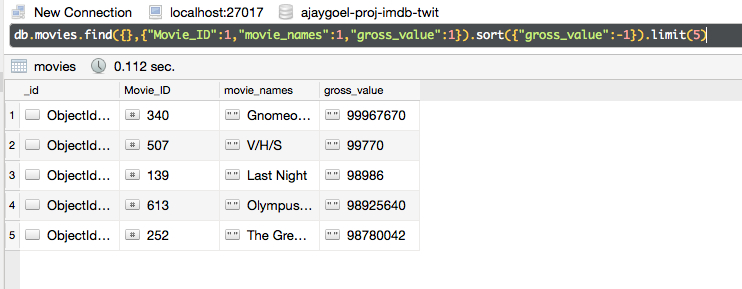

## 3.) Movies that have a "LAND" word in the names of it..
noSQL ------>>>db.movies.find({movie_names: /^A/});

### In NoSQL database ^ is used to check and character from the staring / ^A /, the last "/" denotes that last characters can be anything from A-Z or a-z, or any other thing.

1. But This is not the case in python.
2. We have to use regex for it.
3. regular expression can be compiled which whatever we want to search like in below example we will search for the word "LAND" in the movie names.

We will get output's like shutter island,Alice in Wonderland.

 

In [174]:
import re

In [183]:
rgx = re.compile('.LAND.*', re.IGNORECASE)  # compile the regex

In [184]:
result3 = collection.find({"movie_names":{'$regex':rgx}})

In [185]:
for d in result3[:]:
    print(d)

{'_id': ObjectId('5abaed7bda9d1a11dd39fd3e'), 'Movie_ID': 2, 'movie_names': 'Shutter Island', 'gross_value': '128012934', 'imdb_ratings': 8.1, 'metscores': 63, 'movie_description': '\rIn 1954, a U.S. Marshal investigates the disappearance of a murderer, who escaped from a hospital for the criminally insane.', 'runtime': '138 min', 'votes': 918537, 'certificate': 'R', 'certificate_id': 2, 'year_release': 2010, 'year_id': 1, 'Genre1': 'Mystery', 'Genre2': ' Thriller            ', 'director_name': 'Martin Scorsese', 'Director_id': 2, 'star1': 'Martin Scorsese', 'star2': ' Leonardo DiCaprio', 'star3': ' Emily Mortimer', 'star4': ' Mark Ruffalo'}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd48'), 'Movie_ID': 12, 'movie_names': 'Alice in Wonderland', 'gross_value': '334191110', 'imdb_ratings': 6.5, 'metscores': 53, 'movie_description': "\rNineteen-year-old Alice returns to the magical world from her childhood adventure, where she reunites with her old friends and learns of her true destiny: to en

## Mongo Snippet:
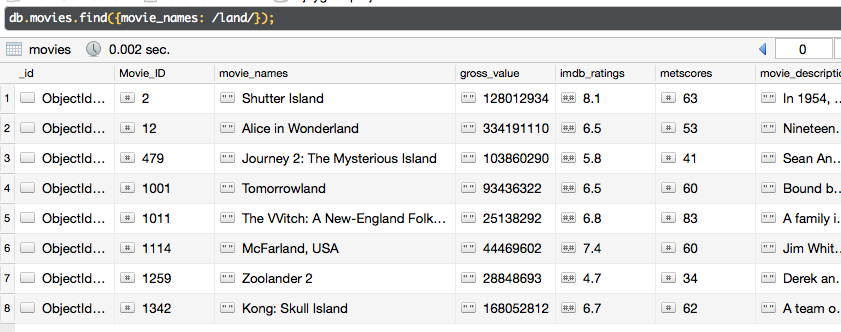

## 4.) To get the movies which have imdb greater than 8.0

db.movies.find({"imdb_ratings":{$gte:8.0}},{"movie_names":1,"imdb_ratings":1})

### I am using "gte" which means "Greater than and equal to".

So, here we will search for the imdb_ratings which have value greater than 8.0

In [188]:
result4 = collection.find({"imdb_ratings":{'$gte':8.0}},{"movie_names":1,"imdb_ratings":1})

In [189]:
for d in result4:
    print(d)

{'_id': ObjectId('5abaed7bda9d1a11dd39fd3d'), 'movie_names': 'Inception', 'imdb_ratings': 8.8}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd3e'), 'movie_names': 'Shutter Island', 'imdb_ratings': 8.1}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd3f'), 'movie_names': 'Toy Story 3', 'imdb_ratings': 8.3}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd40'), 'movie_names': 'Black Swan', 'imdb_ratings': 8.0}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd42'), 'movie_names': "The King's Speech", 'imdb_ratings': 8.0}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd43'), 'movie_names': 'How to Train Your Dragon', 'imdb_ratings': 8.1}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd7f'), 'movie_names': 'Incendies', 'imdb_ratings': 8.2}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd91'), 'movie_names': 'My Name Is Khan', 'imdb_ratings': 8.0}
{'_id': ObjectId('5abaed7bda9d1a11dd39fda1'), 'movie_names': 'Elite Squad: The Enemy Within', 'imdb_ratings': 8.1}
{'_id': ObjectId('5abaed7bda9d1a11dd39fdad'), 'movie_names': 'Inside Job', 'imdb_ratings

## Mongo Snippet:

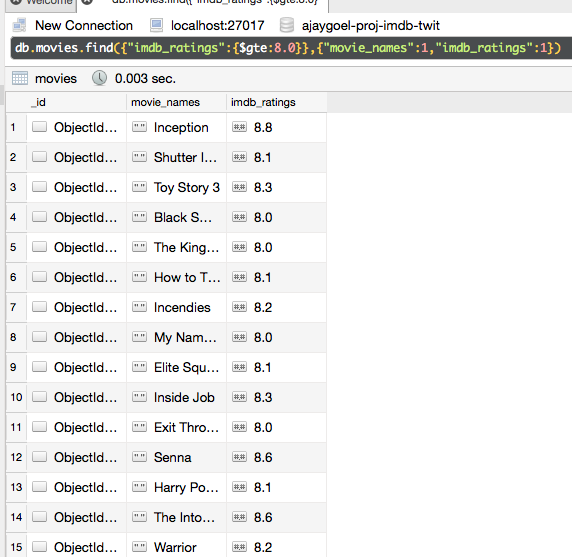

## 5.) To find the movies which have gross value greater than 100000 and imdb rating greater than 8.0

db.movies.find({'$and':[{"imdb_ratings":{'$gte':8.0}}
           ,{"gross_value":{'$gte':"10000"}}]}
    ,{"movie_names":1,"imdb_ratings":1} )   
    
### Using the same gte and and as in my scenario both question should be satisfied which we can achieve by using $and 

We are writing movie_names :1, imdb_ratings : 1 as this will pring only the movie names and imdb ratings apart from the gross value, imdb_ratings that we have used in condition.

In [193]:
from bson.objectid import ObjectId

In [191]:
q5 = [
    {'$and':[{"imdb_ratings":{'$gte':8.0}}
           ,{"gross_value":{'$gte':"10000"}}]}
    ,{"movie_names":1,"imdb_ratings":1}
]

In [206]:
result5 = collection.find({'$and':[{"imdb_ratings":{'$gte':8.0}},{"gross_value":{'$gte':"10000"}}]},{"movie_names":1,"imdb_ratings":1,"gross_value":1})

In [207]:
for d in result5:
    print(d)

{'_id': ObjectId('5abaed7bda9d1a11dd39fd3d'), 'movie_names': 'Inception', 'gross_value': '292576195', 'imdb_ratings': 8.8}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd3e'), 'movie_names': 'Shutter Island', 'gross_value': '128012934', 'imdb_ratings': 8.1}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd3f'), 'movie_names': 'Toy Story 3', 'gross_value': '415004880', 'imdb_ratings': 8.3}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd40'), 'movie_names': 'Black Swan', 'gross_value': '106954678', 'imdb_ratings': 8.0}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd42'), 'movie_names': "The King's Speech", 'gross_value': '138797449', 'imdb_ratings': 8.0}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd43'), 'movie_names': 'How to Train Your Dragon', 'gross_value': '217581231', 'imdb_ratings': 8.1}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd7f'), 'movie_names': 'Incendies', 'gross_value': '6857096', 'imdb_ratings': 8.2}
{'_id': ObjectId('5abaed7bda9d1a11dd39fd91'), 'movie_names': 'My Name Is Khan', 'gross_value': '4018695', 'imd

## Mongo Snippet:

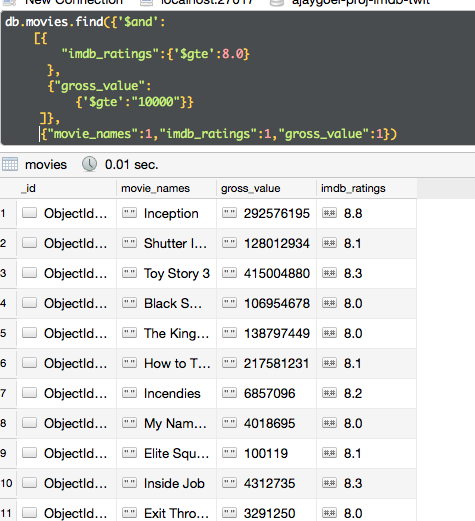

## Making second collection as Hashtags..
I will follow the same method that i have followed above.

But now, I will show to extract data from sqlite and then use it to dump it in MongoDB

## Making connection with sqlite3 so that i can extract hashtags from the movies..

My Database name is 'Project_imdb.db'

In [208]:
imdb_db_nw = 'Project_imdb.db'
conn = sqlite3.connect(imdb_db_nw)
c = conn.cursor()

### Selecting all the columns from the table named as : movie_hashtags_m.
Please note that movie_hashtags_m was created in the SQL version of this project.

In [209]:
rev=c.execute('Select * from movie_hashtags_m')

In [210]:
rows = rev.fetchall()

In [212]:
import pandas as pd

In [223]:
hash_mov_df = pd.DataFrame(rows)

Let's rename the columns:

In [224]:
hash_mov_df.columns=['id','Movie','Hashtags']

In [226]:
hash_mov_df.head()

id      Movie          Hashtags
0   0  Inception              XTRD
1   1  Inception    Fortnitemobile
2   2  Inception          fortnite
3   3  Inception    Fortnitemobile
4   4  Inception  InceptionEsports

Now, i will check the size of the data frame

In [230]:
hash_mov_df.size

5993862

## Design Decision:
Now, i took decision to keep hashtags different in the starting as i knew that hashtags data is very large and it will be easy for me to extract and analyze data. So, i kept it in different collection.

It is totally based on the decision that you will take.

Also, in SQL database, i was using queries to count the hashtags. But here, i will remove the duplicates from the hashtags as it is not logical to keep duplicate mapping of movie and hashtag.

If i would have created the hashtags in movies then i don't have to take this decision of removing duplicates but now, i have to as i am creating separate collection.

In [235]:
hash_mov=hash_mov_df.drop_duplicates('Hashtags')

In [236]:
hash_mov.size

36834

In [237]:
hash_mov.head()

id      Movie          Hashtags
0   0  Inception              XTRD
1   1  Inception    Fortnitemobile
2   2  Inception          fortnite
4   4  Inception  InceptionEsports
5   5  Inception            gaming

Closing the sqlite3 connection.

In [239]:
conn.close()

## Connecting with pymongo again as i closed my notebook earlier. 
So, instead of running above code i will again write the code which will brush up ur basics. Just Kidding!

In [240]:
import pymongo
conn=pymongo.MongoClient()
conn

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [241]:
from pymongo import MongoClient

In [242]:
client = MongoClient()

## The syntax and design is very similar as above.

In [243]:
MongoClient('localhost', 27017)

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [244]:
db = conn.mydb

## Creating connection with the database.

In [245]:
db =conn['ajaygoel-proj-imdb-twit']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ajaygoel-proj-imdb-twit')

## Now here, Please note that we are creating one more collection as hashtags and we are marking them as db.hashtags in collection.

In [246]:
collection=db.hashtags
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ajaygoel-proj-imdb-twit'), 'hashtags')

In [247]:
import json

## Converting it into JSON format:

In [248]:
hash_records = json.loads(hash_mov.T.to_json()).values()

In [249]:
hash_records

dict_values([{'id': 0, 'Movie': 'Inception', 'Hashtags': 'XTRD'}, {'id': 1, 'Movie': 'Inception', 'Hashtags': 'Fortnitemobile'}, {'id': 2, 'Movie': 'Inception', 'Hashtags': 'fortnite'}, {'id': 4, 'Movie': 'Inception', 'Hashtags': 'InceptionEsports'}, {'id': 5, 'Movie': 'Inception', 'Hashtags': 'gaming'}, {'id': 6, 'Movie': 'Inception', 'Hashtags': 'gamesexuals'}, {'id': 7, 'Movie': 'Inception', 'Hashtags': 'teamgodvek'}, {'id': 8, 'Movie': 'Inception', 'Hashtags': 'csgo'}, {'id': 9, 'Movie': 'Inception', 'Hashtags': 'overwatch'}, {'id': 11, 'Movie': 'Inception', 'Hashtags': 'NeverAgain'}, {'id': 14, 'Movie': 'Inception', 'Hashtags': 'inception'}, {'id': 17, 'Movie': 'Inception', 'Hashtags': 'TechX365'}, {'id': 18, 'Movie': 'Inception', 'Hashtags': 'HyperloopTT'}, {'id': 23, 'Movie': 'Inception', 'Hashtags': 'CCAwards2018'}, {'id': 33, 'Movie': 'Inception', 'Hashtags': 'MonkeyTennis'}, {'id': 1156, 'Movie': 'Shutter Island', 'Hashtags': 'Scorsese10'}, {'id': 1158, 'Movie': 'Shutter Isla

## Insertion in mongodb:

In [251]:
collection.insert(hash_records)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  if __name__ == '__main__':


[ObjectId('5abb0d11da9d1a11dd3a0335'),
 ObjectId('5abb0d11da9d1a11dd3a0336'),
 ObjectId('5abb0d11da9d1a11dd3a0337'),
 ObjectId('5abb0d11da9d1a11dd3a0338'),
 ObjectId('5abb0d11da9d1a11dd3a0339'),
 ObjectId('5abb0d11da9d1a11dd3a033a'),
 ObjectId('5abb0d11da9d1a11dd3a033b'),
 ObjectId('5abb0d11da9d1a11dd3a033c'),
 ObjectId('5abb0d11da9d1a11dd3a033d'),
 ObjectId('5abb0d11da9d1a11dd3a033e'),
 ObjectId('5abb0d11da9d1a11dd3a033f'),
 ObjectId('5abb0d11da9d1a11dd3a0340'),
 ObjectId('5abb0d11da9d1a11dd3a0341'),
 ObjectId('5abb0d11da9d1a11dd3a0342'),
 ObjectId('5abb0d11da9d1a11dd3a0343'),
 ObjectId('5abb0d11da9d1a11dd3a0344'),
 ObjectId('5abb0d11da9d1a11dd3a0345'),
 ObjectId('5abb0d11da9d1a11dd3a0346'),
 ObjectId('5abb0d11da9d1a11dd3a0347'),
 ObjectId('5abb0d11da9d1a11dd3a0348'),
 ObjectId('5abb0d11da9d1a11dd3a0349'),
 ObjectId('5abb0d11da9d1a11dd3a034a'),
 ObjectId('5abb0d11da9d1a11dd3a034b'),
 ObjectId('5abb0d11da9d1a11dd3a034c'),
 ObjectId('5abb0d11da9d1a11dd3a034d'),
 ObjectId('5abb0d11da9d1a

In [252]:
results12 = collection.find({"Movie":"Inception"},{"Hashtags":1})

## Fetching the result:

In [253]:
for d in results12:
    print(d)

{'_id': ObjectId('5abb0d11da9d1a11dd3a0335'), 'Hashtags': 'XTRD'}
{'_id': ObjectId('5abb0d11da9d1a11dd3a0336'), 'Hashtags': 'Fortnitemobile'}
{'_id': ObjectId('5abb0d11da9d1a11dd3a0337'), 'Hashtags': 'fortnite'}
{'_id': ObjectId('5abb0d11da9d1a11dd3a0338'), 'Hashtags': 'InceptionEsports'}
{'_id': ObjectId('5abb0d11da9d1a11dd3a0339'), 'Hashtags': 'gaming'}
{'_id': ObjectId('5abb0d11da9d1a11dd3a033a'), 'Hashtags': 'gamesexuals'}
{'_id': ObjectId('5abb0d11da9d1a11dd3a033b'), 'Hashtags': 'teamgodvek'}
{'_id': ObjectId('5abb0d11da9d1a11dd3a033c'), 'Hashtags': 'csgo'}
{'_id': ObjectId('5abb0d11da9d1a11dd3a033d'), 'Hashtags': 'overwatch'}
{'_id': ObjectId('5abb0d11da9d1a11dd3a033e'), 'Hashtags': 'NeverAgain'}
{'_id': ObjectId('5abb0d11da9d1a11dd3a033f'), 'Hashtags': 'inception'}
{'_id': ObjectId('5abb0d11da9d1a11dd3a0340'), 'Hashtags': 'TechX365'}
{'_id': ObjectId('5abb0d11da9d1a11dd3a0341'), 'Hashtags': 'HyperloopTT'}
{'_id': ObjectId('5abb0d11da9d1a11dd3a0342'), 'Hashtags': 'CCAwards2018'}


## Now, i hope you have got a basic idea how to dump, query and write database queries in Mongodb using Python.
If not, Don't worry!
### I will explain further things and queries in second notebook named as: Take_Home_Exam_2_MongoDb_Part2.